#### Test of stuff exported from Mathematica for case "MatrixElementExport" of CryoTriple4B4W4B4W4B4W

## Preliminaries

In [2]:
import sys
sys.path.append('/Users/t.seetharamu.1/Documents/svn/GCIF/GCIF planning/Infrastructure cryogenics/CommonPlatformTriple_4B4W_2x4B4W4W/MatrixElementExport')

### Other system dependencies

In [2]:
import os

In [3]:
from math import pi,sqrt

In [4]:
import numpy as np

In [5]:
# import scipy.linalg

In [6]:
import control as ct

In [7]:
import matplotlib.pyplot as plt

In [5]:
import os
import pandas as pd
import inspect
from math import pi,sqrt
from decimal import Decimal

import numpy as np

# import scipy.linalg
from matplotlib.ticker import MultipleLocator
import control as ct

import matplotlib.pyplot as plt
import importlib

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18          # Default font size for text
plt.rcParams['axes.titlesize'] = 22     # Font size for axes titles
plt.rcParams['axes.labelsize'] = 18     # Font size for axes labels
plt.rcParams['xtick.labelsize'] = 14    # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 14    # Font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 15    # Font size for legend


/var/folders/gh/jhjc71wd5zb_26ghvct14n940000gp/T/ipykernel_96357/2219581057.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(patches.Rectangle((pos[0], pos[1]), block_width, block_height, color='skyblue', edgecolor="blue"))
/var/folders/gh/jhjc71wd5zb_26ghvct14n940000gp/T/ipykernel_96357/2219581057.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(patches.Circle((1 + (i % 2) * 2, y), circle_radius, color='skyblue', edgecolor="blue"))


IndexError: list index out of range

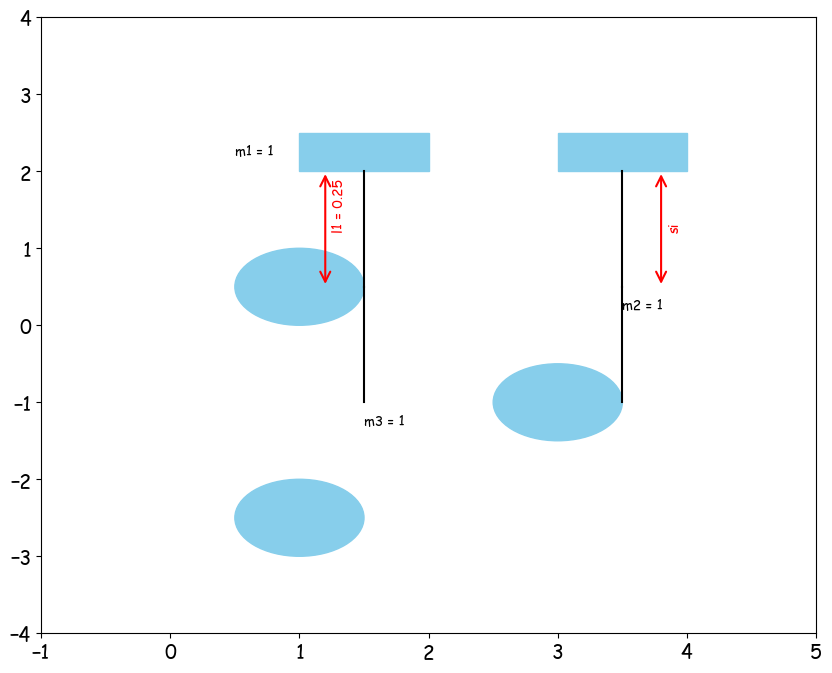

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-1, 5)
ax.set_ylim(-4, 4)

# Define positions and dimensions for blocks and circles
block_width = 1
block_height = 0.5
circle_radius = 0.5
y_positions = [2, 0.5, -1, -2.5]  # positions for m1, m2, m3

# Define the block positions
block_positions = [(1, y_positions[0]), (3, y_positions[0])]

# Draw the blocks
for pos in block_positions:
    ax.add_patch(patches.Rectangle((pos[0], pos[1]), block_width, block_height, color='skyblue', edgecolor="blue"))

# Draw the circles
for i, y in enumerate(y_positions[1:]):
    ax.add_patch(patches.Circle((1 + (i % 2) * 2, y), circle_radius, color='skyblue', edgecolor="blue"))

# Draw lines (representing rods or connectors)
line_positions = [((1.5, y_positions[0]), (1.5, y_positions[1])),
                  ((1.5, y_positions[1]), (1.5, y_positions[2])),
                  ((3.5, y_positions[0]), (3.5, y_positions[1])),
                  ((3.5, y_positions[1]), (3.5, y_positions[2]))]
for start, end in line_positions:
    ax.plot([start[0], end[0]], [start[1], end[1]], 'k-', linewidth=1.5)

# Draw arrows for dimensions
arrow_params = dict(arrowstyle="<->", color="red", lw=1.5)
ax.annotate('', xy=(1.2, y_positions[0]), xytext=(1.2, y_positions[1]), arrowprops=arrow_params)
ax.text(1.25, (y_positions[0] + y_positions[1]) / 2, 'l1 = 0.25', color='red', fontsize=10, rotation=90)

ax.annotate('', xy=(3.8, y_positions[0]), xytext=(3.8, y_positions[1]), arrowprops=arrow_params)
ax.text(3.85, (y_positions[0] + y_positions[1]) / 2, 'si', color='red', fontsize=10, rotation=90)

# Add text labels for masses and other values
mass_texts = ['m1 = 1', 'm2 = 1', 'm3 = 1']
for i, y in enumerate(y_positions):
    if i == 0:
        ax.text(0.5, y + 0.2, mass_texts[i], color='black', fontsize=10)
    else:
        ax.text(1.5 if i % 2 == 0 else 3.5, y - 0.3, mass_texts[i], color='black', fontsize=10)

# Add dimension labels (for n1, n2, etc., adjust according to your layout)
dim_labels = ['n1', 'n2', 'n3', 'n4', 'n5']
for i, y in enumerate(y_positions[1:]):
    x_pos = 0.7 if i % 2 == 0 else 3.3
    ax.text(x_pos, y, dim_labels[i], color='yellow', fontsize=12)

# Finalize plot appearance
ax.set_aspect('equal')
ax.axis('off')  # Hide axes

plt.show()


### CryoTriple2B2W4B4W4B4W model definition data and matrix element functions exported from Mathematica 

In [8]:
import symbexportCommonPlatformTriple_4B4W_2x4B4W4Wfull as tpmodel

### Parameters exported from Mathematica

In [9]:
import CommonPlatformTriple_4B4W_2x4B4W4W_MatrixElementExport_cptriple as tp

In [ ]:

n3 = 0.0405
def reboot_params():
    importlib.reload(tp)
    tp.n3 = 0.0405
    tp.n4 = n3
    tp.n5 = n3
    revised_sus_length = 0.298
    tp.kw1= 1396.07
    tp.kw2=tp.kw1
    tp.kw3=70520.4
    tp.l1 = revised_sus_length
    tp.l2 = revised_sus_length
    tp.l3 = revised_sus_length

    
    
def original_params():
    importlib.reload(tp)
    revised_sus_length = 0.298


    data =     [["Masses", "m1 / m2 / m3", [round(tp.m1,2) ,round(tp.m2,2) ,round(tp.m3,2)]],

    ["Roll Moment of Inertia", "I1,x / I2,x / I3,x",  [round(i,5) for i in [tp.I1x, tp.I2x , tp.I3x]]],

    ["Pitch Moment of Inertia", "I1,y / I2,y / I3,y",  [round(i,5) for i in [tp.I1y, tp.I2y , tp.I3y]]],

    ["Yaw Moment of Inertia", "I1,z / I2,z / I3,z", [round(i,5) for i in [tp.I1z, tp.I2z , tp.I3z]]],
    
            ["Stretched wire lengths", "l1 / l2 / l3", [tp.l1 , tp.l2, tp.l3]], 
            ["Upper end wire vertical attachment distance", "dtop / d1/ d3 " , [round(i,3) for i in [tp.dtop, tp.d1 , tp.d3]]],
            ["Bottom end wire vertical attachment distance", "d0 / d2 / d4" , [round(i,3) for i in [tp.d0 , tp.d2, tp.d4]]],
            
            ["Longitudinal wire separation" , "su / si / sl", [tp.su, tp.si , tp.sl]],
            ["Upper transverse wire separation", "n0 / n2 / n4 ", [tp.n0, tp.n2 , tp.n4]],
            ["Bottom transverse wire separation", "n1 / n3 / n5 ", [tp.n1, tp.n3 , tp.n5]],
            ["Vertical Spring stiffness", "kbuz / kbiz / kblz", [tp.kbuz, "NA", tp.kblz]],
            ["Wire Lengths", "l1 / l2 / l3", [tp.l1 , tp.l2 , tp.l3]],
            ["Youngs Moduli of the wires", "Y1 / Y2 / Y3", ['%.5E' % Decimal(tp.Y1), '%.5E' % Decimal(tp.Y2), '%.5E' % Decimal(tp.Y3)]]]



    params = pd.DataFrame(data, columns = ["Description", "Parameter","Values"])
    # Setting display options
    pd.set_option('display.width', 1000)  # Set width to a large value to prevent wrapping
    pd.set_option('display.max_colwidth', None)  # Display full contents of each cell without truncation
    print(params)
    
def print_modes(eigens):
    Hz = eigens[0]
    evecs = eigens[1]
    dofs = []
    dof_amps = []
    for j in range(0,18): 
        df =pd.DataFrame(np.array(list(zip(tpmodel.allvars,list(evecs[j])))), columns=["DOF","Amp"])
        df["Amp"] = [(round(float(i),2)) for i in list(df["Amp"])] 
        df = (df[df["Amp"]!=0])
        df = df.sort_values(by='Amp', ascending=False, key=abs)
        dofs.append(np.array(df["DOF"]))
        dof_amps.append(np.array(df["Amp"]))
        
    modes = pd.DataFrame({"Freq":Hz, "DOF":dofs, "Amps":dof_amps})
    
    def calculate_ratio(row):
        dof = row['DOF']
        amps = row['Amps']
        
        # Identify the mode type from the first entry
        mode = dof[0].rstrip('123')
        
        # Find indices of first and third occurrences for the identified mode
        first_idx = next((i for i, d in enumerate(dof) if d.startswith(mode + '1')), None)
        third_idx = next((i for i, d in enumerate(dof) if d.startswith(mode + '3')), None)
        
        # Calculate the ratio if both indices are found
        if first_idx is not None and third_idx is not None:
            return amps[first_idx] / amps[third_idx] if amps[third_idx] != 0 else None
        return None

    # Apply the function and create a new column
    modes['Mode_vis'] = modes.apply(calculate_ratio, axis=1)

# # Display the updated dataframe
# display(df)
    return modes
        
#         print (Hz[0])
def mode_forest(mode_amp, fig=None, ax = None):
    Hz = mode_amp[0]
    evecs = mode_amp[1]
    dofs = []
    dof_amps = []
    for j in range(0,18): 
        df =pd.DataFrame(np.array(list(zip(tpmodel.allvars,list(evecs[j])))), columns=["DOF","Amp"])
        df["Amp"] = [np.abs(round(float(i),2)) for i in list(df["Amp"])] 
        df = (df[df["Amp"]!=0])
        df = df.sort_values(by='Amp', ascending=False)
        dofs.append(np.array(df["DOF"]))
        dof_amps.append(np.array(df["Amp"]))
        
    
    
        if any(df["DOF"].iloc[i] in ["x1", "x2", "x3", "pitch1", "pitch2", "pitch3"] and df["Amp"].iloc[i] > 0.1 for i in range(len(df))):
            ax.scatter(Hz[j],"Long-pitch Mode", c= "red")
            ax.text(Hz[j] + 0.1,"Long-pitch Mode", str(round(Hz[j],3)), fontsize=10)  # Adjust 0.1 to position the text appropriately
        elif any(df["DOF"].iloc[j] in ["y1", "y2", "y3","roll1", "roll2", "roll3"] and df["Amp"].iloc[j] > 0.1 for j in range(len(df))):
            ax.scatter(Hz[j],"Trans-roll Mode", c = "blue")
            ax.text(Hz[j] + 0.1,"Trans-roll Mode", str(round(Hz[j],3)), fontsize=15)
        elif any(df["DOF"].iloc[j] in ["z1", "z2", "z3"] and df["Amp"].iloc[j] > 0.1 for j in range(len(df))):
            ax.scatter(Hz[j],"Bounce Mode", c = "black")    
            ax.text(Hz[j] + 0.1,"Bounce Mode", str(round(Hz[j],3)), fontsize=15)
        elif any(df["DOF"].iloc[j] in ["yaw1", "yaw2", "yaw3"] and df["Amp"].iloc[j] > 0.1 for j in range(len(df))):
            ax.scatter(Hz[j],"Yaw Mode", c = "green")    
            ax.text(Hz[j] + 0.1,"Yaw Mode", str(round(Hz[j],3)), fontsize=15)
#         elif any(df["DOF"].iloc[j] in ["pitch1", "pitch2", "pitch3"] and df["Amp"].iloc[j] > 0.5 for j in range(len(df))):
#             ax.scatter(Hz[j],"Pitch", c = "cyan")
#             ax.text(Hz[j] + 0.1,"Pitch", str(round(Hz[j],3)), fontsize=15)
#         elif any(df["DOF"].iloc[j] in ["roll1", "roll2", "roll3"] and df["Amp"].iloc[j] > 0.5 for j in range(len(df))):
#             ax.scatter(Hz[j],"Roll", c = "brown")
#             ax.text(Hz[j] + 0.1,"Roll", str(round(Hz[j],3)), fontsize=15)
        ax.grid()
        ax.set_ylabel("Modes", fontsize = 20)
        ax.set_xlabel("Freq (Hz)", fontsize = 20)
        ax.tick_params(axis = "both", labelsize = 15)
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        
    modes = pd.DataFrame({"Freq":Hz, "DOF":dofs, "Amps":dof_amps})
        
    return fig, ax
         



def changes(mutation):
    reboot_params()
    for name, value in zip(mutation.iloc[:, 0], mutation.iloc[:, 1]):
        locals()[name] = value
    # print(mutation)
    # print(d2)
    revised_sus_length = 0.298
    tp.kw1= 1396.07
    tp.kw2=tp.kw1
    tp.kw3=70520.4
    tp.l1 = revised_sus_length
    tp.l2 = revised_sus_length
    tp.l3 = revised_sus_length
    #Some constraints 
    global n3
    n3 = 0.0405
    n4 = n3
    n5 = n3
    d = [d2, d3 , d4]
    s = [su, si, sl]
    if any(i>26.5e-3 for i in d)==True:
        print ("d is not practical")
    if any(i>28.5e-3 for i in s)== True:
        print ("s is not practical")
        
    def assign_to_tp(mutation, tp):
        for index, row in mutation.iterrows():
            string = row['Parameters']
            value = row['Values']
            # Dynamically set the attribute to the corresponding value
            setattr(tp, string, value)

# Call the function
    assign_to_tp(mutation, tp)
    # this seems to have a global imapct and i am not able to print out the original parameters again 
    # tp.d0 = d0  
    # tp.d1 = d1
    # tp.d2 = d2
    # tp.d3 = d3
    # tp.d4 = d4
    # tp.n0 = n0 
    # tp.n1 = n1 
    # tp.n2 = n2
    # tp.su = su
    # tp.si = si
    # tp.sl = sl
    # tp.n3 = n3
    # tp.n4 = n4
    # tp.n5 = n3 
    
    
    
    pend = tpmodel.pendSS(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs])
    (Hz,evecs) = tpmodel.eigenmodes(*[getattr(tp, coeff) for coeff in tpmodel.stdcoeffs])
    mode_amp = (Hz,evecs)
    
    data =     [["Masses", "m1 / m2 / m3", [round(tp.m1,2) ,round(tp.m2,2) ,round(tp.m3,2)]],

    ["Roll Moment of Inertia", "I1,x / I2,x / I3,x",[round(i,5) for i in [tp.I1x, tp.I2x , tp.I3x]]],

    ["Pitch Moment of Inertia", "I1,y / I2,y / I3,y", [round(i,5) for i in [tp.I1y, tp.I2y , tp.I3y]]],

    ["Yaw Moment of Inertia", "I1,z / I2,z / I3,z",  [round(i,5) for i in [tp.I1z, tp.I2z , tp.I3z]]],
    
            ["Stretched wire lengths", "l1 / l2 / l3", [tp.l1 , tp.l2, tp.l3]], 
            ["Upper end wire vertical attachment distance", "dtop / d1/ d3 " , [round(i,3) for i in [tp.dtop, tp.d1 , tp.d3]]],
            ["Bottom end wire vertical attachment distance", "d0 / d2 / d4" , [round(i,3) for i in [tp.d0 , tp.d2, tp.d4]]],
            
            ["Longitudinal wire separation" , "su / si / sl", [tp.su, tp.si , tp.sl]],
            ["Upper transverse wire separation", "n0 / n2 / n4 ", [tp.n0, tp.n2 , tp.n4]],
            ["Bottom transverse wire separation", "n1 / n3 / n5 ", [tp.n1, tp.n3 , tp.n5]],
            ["Vertical Spring stiffness", "kbuz / kbiz / kblz", [tp.kbuz, "NA", tp.kblz]],
            ["Wire Lengths", "l1 / l2 / l3", [tp.l1 , tp.l2 , tp.l3]],
            ["Youngs Moduli of the wires", "Y1 / Y2 / Y3", ['%.5E' % Decimal(tp.Y1), '%.5E' % Decimal(tp.Y2), '%.5E' % Decimal(tp.Y3)]]]


    params = pd.DataFrame(data, columns = ["Description", "Parameter","Values"])
    # Setting display options
    pd.set_option('display.width', 1000)  # Set width to a large value to prevent wrapping
    pd.set_option('display.max_colwidth', None)  # Display full contents of each cell without truncation
    return params, pend, mode_amp

# def new_pend(d0,d1,d2,d3,d4,n0,n1,n2,su,si,sl):
#     #Some constraints 
#     global n3
#     n3 = 0.0405
#     n4 = n3
#     n5 = n3
#     d = [d2, d3 , d4]
#     s = [su, si, sl]
#     if any(i>26.5e-3 for i in d)==True:
#         print ("d is not practical")
#     if any(i>28.5e-3 for i in s)== True:
#         print ("s is not practical")
#     tp.d0 = d0  
#     tp.d1 = d1
#     tp.d2 = d2
#     tp.d3 = d3
#     tp.d4 = d4
#     tp.n0 = n0 
#     tp.n1 = n1 
#     tp.n2 = n2
#     tp.su = su
#     tp.si = si
#     tp.sl = sl
#     tp.n3 = n3
#     tp.n4 = n4
#     tp.n5 = n3 
    
    
#     return tpmodel.pendSS(tp.g,tp.m1,tp.m2,tp.m3,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2x,tp.I2y,tp.I2z,tp.I2xy,tp.I2yz,tp.I2zx,tp.I3x,tp.I3y,tp.I3z,tp.I3xy,tp.I3yz,tp.I3zx,tp.dtop,tp.d0,tp.d1,tp.d2,tp.d3,tp.d4,tp.n0,tp.n1,tp.n2,tp.n3,tp.n4,tp.n5,tp.su,tp.si,tp.sl,tp.kbuz,tp.kbiz,tp.kblz,tp.l1,tp.l2,tp.l3,tp.kw1,tp.kw2,tp.kw3,tp.Y1,tp.Y2,tp.Y3,tp.M11,tp.M21,tp.M31)

def trimio_tf(pend,newinputs,newoutputs):
	'''A function to trim a state space object to have only the specified subsets of inputs and output.'''
	A=pend.A
	B=pend.B
	C=pend.C
	D=pend.D
	oldinputs=pend.input_index
	oldoutputs=pend.output_index
	oldstates=pend.state_index
	newinputlist = []
	for i in range(len(newinputs)):
			newinputlist.append(oldinputs.get(newinputs[i],0))
	newoutputlist = []
	for i in range(len(newoutputs)):
			newoutputlist.append(oldoutputs.get(newoutputs[i],0))
	BB=B[range(len(oldstates))][...,newinputlist]
	CC=C[newoutputlist]
	DD=D[newoutputlist][...,newinputlist]
	return ct.ss2tf(A,BB,CC,DD)


### The stiffness matrix for the floats

In [10]:
qm = tpmodel.qm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [11]:
qm.shape

(12, 12)

### The coupling matrix between floats and params

In [12]:
cqsm = tpmodel.cqsm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [13]:
cqsm.shape

(12, 6)

### The coupling matrix between floats and vars

In [14]:
cqxm = tpmodel.cqxm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [15]:
cqxm.shape

(12, 30)

### The stiffness matrix for the params (raw, then effective)

In [16]:
sm = tpmodel.sm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [17]:
sm.shape

(6, 6)

In [18]:
smeff = tpmodel.smeff(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [19]:
smeff.shape

(6, 6)

### The coupling matrix between vars and params (raw then effective)

In [20]:
cxsm = tpmodel.cxsm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [21]:
cxsm.shape

(30, 6)

In [22]:
cxsmeff = tpmodel.cxsmeff(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [23]:
cxsmeff.shape

(30, 6)

### The stiffness matrix for vars (raw, then effective)

In [24]:
xm = tpmodel.xm(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [25]:
xm.shape

(30, 30)

In [26]:
xmeff=tpmodel.xmeff(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [27]:
xmeff.shape

(30, 30)

### The mass matrix

In [28]:
km = tpmodel.km(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [29]:
km.shape

(30, 30)

# Generate state space

## Generate full A, B, C, D matrices

In [30]:
A = tpmodel.A(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [31]:
A.shape

(60, 60)

In [32]:
B = tpmodel.B(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [33]:
B.shape

(60, 36)

In [34]:
C = tpmodel.C(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [35]:
C.shape

(36, 60)

In [36]:
D = tpmodel.D(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [37]:
D.shape

(36, 36)

## Generate full state space object

In [38]:
pend = tpmodel.pendSS(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [39]:
## Try a Bode plot of x00 (support) displacement input to x3 (optic) displacement

In [40]:
pend_x00_x3=tpmodel.trimio(pend,["x00"],["x3I"])

TypeError: iter() returned non-iterator of type 'numpy.ndarray'

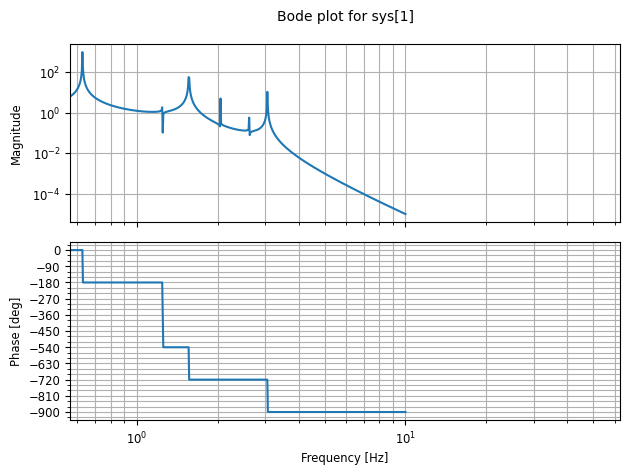

In [42]:
magd,phased,omegad=ct.bode_plot(pend_x00_x3,Hz=True,omega_limits=[2*pi*0.09,2*pi*10])

## Try a Bode plot of x1 (top mass) force input to x3 (optic) displacement

In [43]:
pend_x1_x3=tpmodel.trimio(pend,["f_x1"],["x3I"])

TypeError: iter() returned non-iterator of type 'numpy.ndarray'

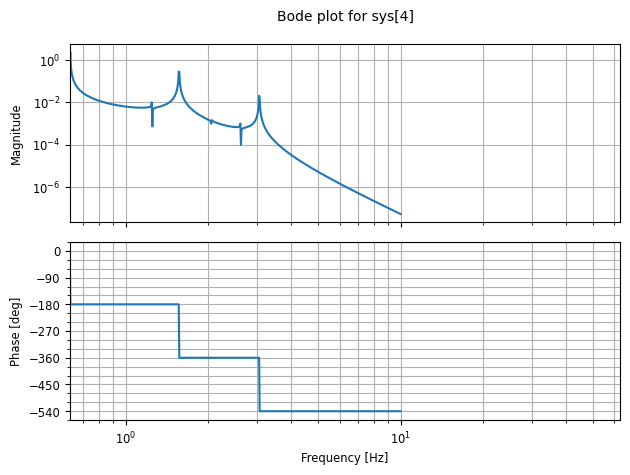

In [44]:
magf,phasef,omegaf=ct.bode_plot(pend_x1_x3,Hz=True,omega_limits=[2*pi*0.1,2*pi*10])

# Eigenmode stuff

In [45]:
(Hz,evecs) = tpmodel.eigenmodes(tp.g,tp.m1,tp.m2I,tp.m2E,tp.m3I,tp.m3E,tp.I1x,tp.I1y,tp.I1z,tp.I1xy,tp.I1yz,tp.I1zx,tp.I2Ix,tp.I2Iy,tp.I2Iz,tp.I2Ixy,tp.I2Iyz,tp.I2Izx,tp.I2Ex,tp.I2Ey,tp.I2Ez,tp.I2Exy,tp.I2Eyz,tp.I2Ezx,tp.I3Ix,tp.I3Iy,tp.I3Iz,tp.I3Ixy,tp.I3Iyz,tp.I3Izx,tp.I3Ex,tp.I3Ey,tp.I3Ez,tp.I3Exy,tp.I3Eyz,tp.I3Ezx,tp.dtop,tp.d0,tp.d1I,tp.d1E,tp.d2I,tp.d2E,tp.d3I,tp.d3E,tp.d4I,tp.d4E,tp.chainIx,tp.chainEx,tp.n0,tp.n1,tp.n2I,tp.n2E,tp.n3I,tp.n3E,tp.n4I,tp.n4E,tp.n5I,tp.n5E,tp.su,tp.siI,tp.siE,tp.slI,tp.slE,tp.kbuz,tp.kbizI,tp.kbizE,tp.l1,tp.l2I,tp.l2E,tp.l3I,tp.l3E,tp.kw1,tp.kw2I,tp.kw2E,tp.kw3I,tp.kw3E,tp.Y1,tp.Y2I,tp.Y2E,tp.Y3I,tp.Y3E,tp.M11,tp.M21I,tp.M21E,tp.M31I,tp.M31E)

In [46]:
Hz

array([16.46941993, 16.29726517, 14.96751606, 13.53943992, 12.55220632,
       10.7991159 ,  7.84163221,  6.06623627,  3.70398967,  3.06418708,
        3.06169273,  2.67428615,  2.62633613,  2.62188675,  2.61559849,
        2.49584939,  2.05076079,  1.89820814,  1.84279054,  1.69746625,
        1.56377207,  1.55868019,  1.25818682,  1.24783384,  1.08341636,
        1.02308782,  0.75586771,  0.67422179,  0.6303582 ,  0.6283834 ])

## Examine the lowest frequency mode (x and pitch)

In [47]:
list(zip(tpmodel.allvars,list(evecs[29])))

[('x1', np.float64(-0.0721857619065905)),
 ('y1', np.float64(-8.602035398421815e-16)),
 ('z1', np.float64(-1.1795111108529987e-16)),
 ('yaw1', np.float64(1.9051238112378977e-15)),
 ('pitch1', np.float64(0.05310999055993104)),
 ('roll1', np.float64(-2.0268562556791124e-16)),
 ('x2I', np.float64(-0.15733962294617782)),
 ('y2I', np.float64(-2.089267001311621e-15)),
 ('z2I', np.float64(0.0027757686742550915)),
 ('yaw2I', np.float64(3.8591652545555317e-16)),
 ('pitch2I', np.float64(0.41707740240684105)),
 ('roll2I', np.float64(-1.48132841978053e-14)),
 ('x2E', np.float64(-0.1573396229461778)),
 ('y2E', np.float64(-1.96423491299887e-15)),
 ('z2E', np.float64(-0.0027757686742557156)),
 ('yaw2E', np.float64(3.6151427985329924e-16)),
 ('pitch2E', np.float64(0.41707740240684477)),
 ('roll2E', np.float64(-3.0481467359603457e-15)),
 ('x3I', np.float64(-0.26475758550198514)),
 ('y3I', np.float64(-3.491222452054436e-15)),
 ('z3I', np.float64(0.0027886504895874753)),
 ('yaw3I', np.float64(6.120344703